In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pip install fuzzy-c-means

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from scipy.cluster import hierarchy
import plotly.graph_objects as go
from fcmeans import FCM

In [ ]:
# 
data = pd.read_csv("/content/drive/MyDrive/Bmi-Data.csv")
data.head()

,Level,Faculty,Gender,Age,Weight,Height,Family_Size,BMI,Income,Daily_Eating,Fruit_Intake,BMI_Cat,BMI_Awareness,Daily_Sleeping_Hours,Exercise_Frequency,Do_You_Need_Help_In_Maintaining_A_Healthy_Lifestyle,Need_A_BMI_App,A_Normal_BMI_Is_A_Function_Of_A_Healthy_Lifestyle
0,4,2,2,20,95.0,1.69,6,33.10,2,2,2,3,1,3,3,1,1,5
1,2,1,1,21,72.0,1.81,9,21.97,2,2,3,1,4,3,2,1,2,3
2,4,1,1,21,66.0,1.77,6,21.06,3,2,4,1,2,2,4,1,1,4
3,4,1,1,22,72.0,1.73,3,24.07,2,3,3,1,2,3,2,2,1,3
4,2,2,2,18,57.0,1.54,4,24.00,1,1,2,1,2,2,3,2,2,4


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,150.0,3.866667,1.826967,1.00,2.00,4.000,6.000,6.0
Faculty,150.0,1.713333,0.762693,1.00,1.00,2.000,2.000,3.0
Gender,150.0,1.506667,0.501630,1.00,1.00,2.000,2.000,2.0
Age,150.0,25.060000,9.481335,16.00,19.00,21.000,30.000,59.0
Weight,150.0,68.290000,13.193230,42.00,58.25,66.500,76.000,104.0
Height,150.0,1.644467,0.104049,1.38,1.57,1.640,1.720,1.9
Family_Size,150.0,5.613333,1.805237,2.00,4.00,5.500,7.000,13.0
BMI,150.0,25.311733,5.050933,18.51,21.47,24.085,28.115,41.1
Income,150.0,2.746667,0.844935,1.00,2.00,3.000,3.000,4.0
Daily_Eating,150.0,2.366667,0.699153,1.00,2.00,2.000,3.000,4.0


# Data preprocessing




drop duplicate value

In [ ]:
data = data.drop_duplicates(keep="first")
data.shape

(150, 18)

Deal with missing value

<Figure size 720x432 with 0 Axes>

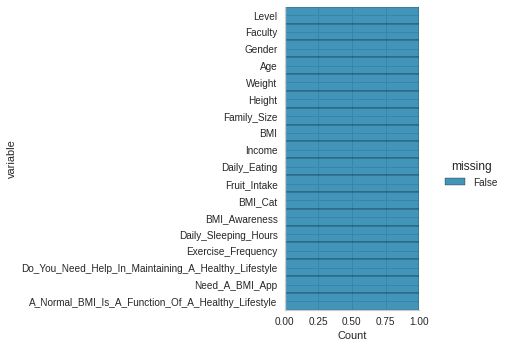

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

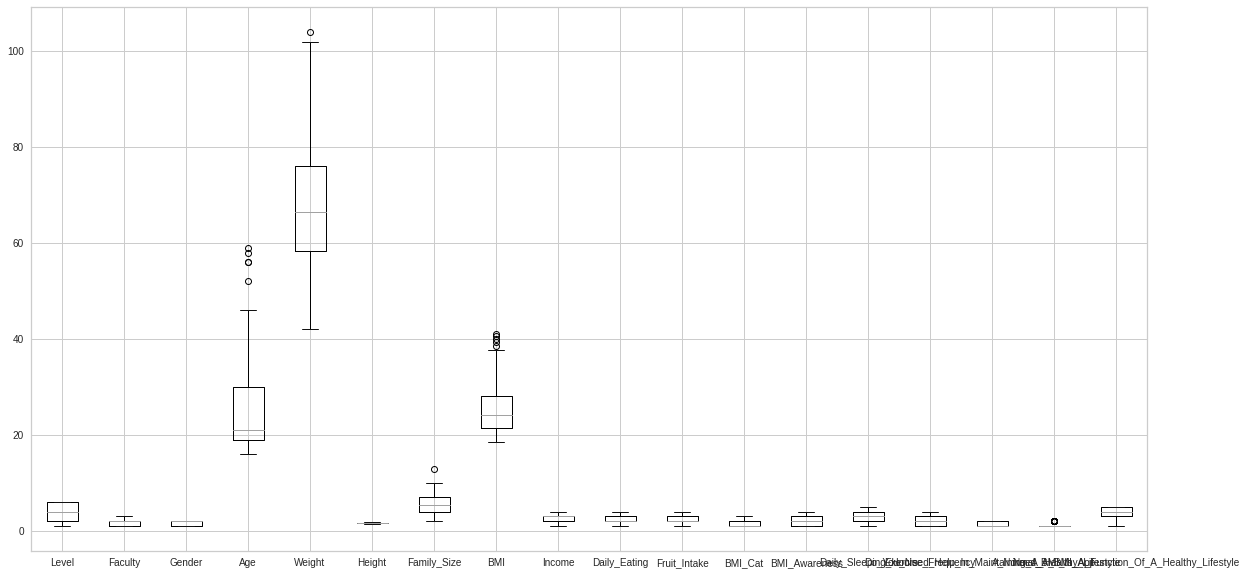

In [ ]:
plt.figure(figsize=(20,10))
data.boxplot()

## correlation

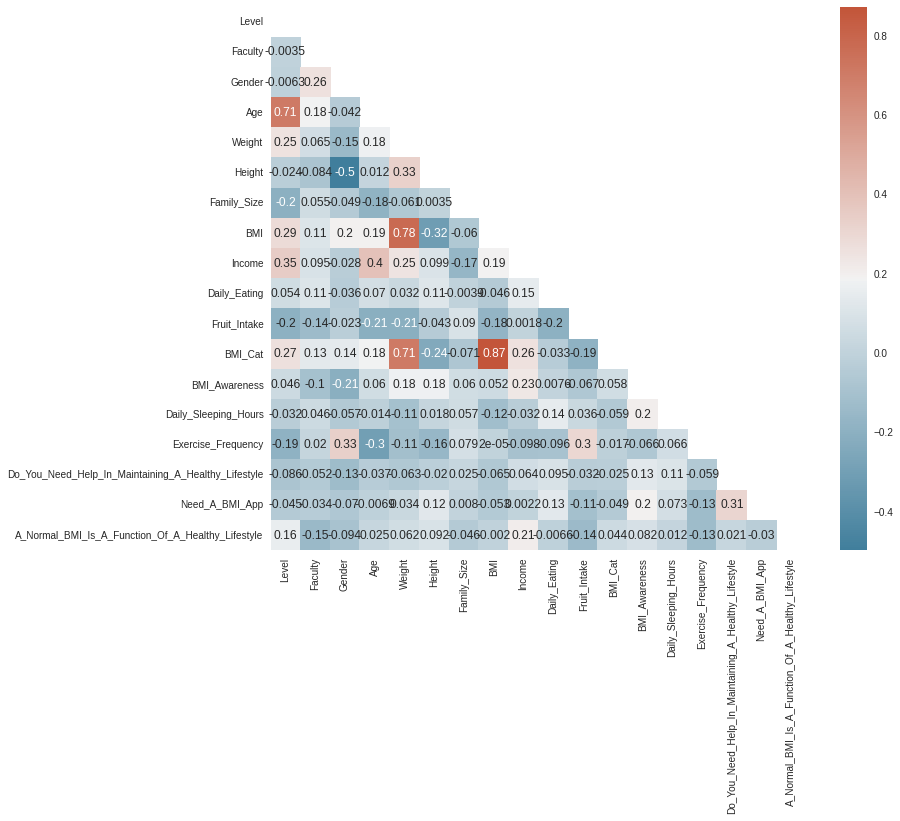

In [ ]:
corr = data.corr()

f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Standardization

In [ ]:
data1 = data.drop(['BMI'], axis=1)

In [ ]:
data_scaled = StandardScaler().fit_transform(data)
data1_scaled = StandardScaler().fit_transform(data1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


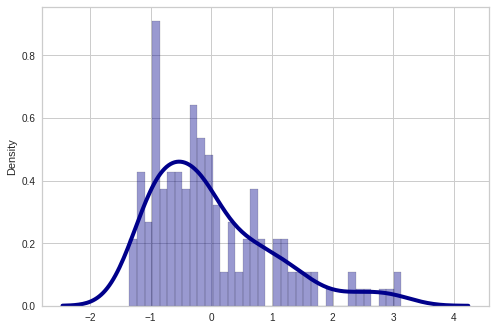

In [ ]:
sns.distplot(data_scaled[:,7], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



```
# Ce texte est au format code
```

### Data reduction  | we will do Principal component Analysis

In [ ]:
pca = PCA(n_components=5)
df_reduced = pca.fit_transform(data_scaled)

## pca.explained_variance_ratio_ gives us the percentage of variance explained by each component.

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.18238414 0.12790763 0.09092307 0.08125834 0.06910429]
0.5515774720958764


### Clusterning

In [ ]:
wcss = []
n=11
for i in range(1, n):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_reduced)
    wcss.append(kmeans.inertia_)

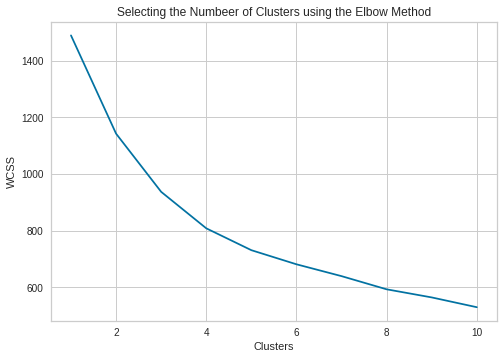

In [ ]:
plt.plot(range(1, n), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

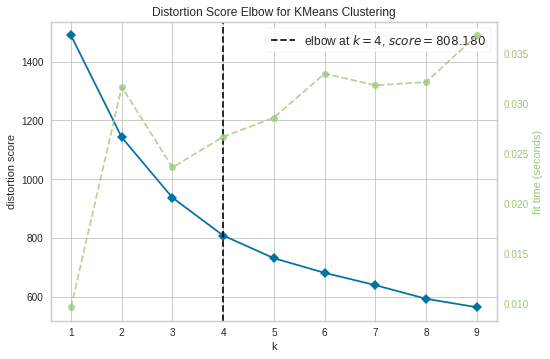

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(1,10))
 
visualizer.fit(df_reduced)        # Fit the data to the visualizer
visualizer.show()

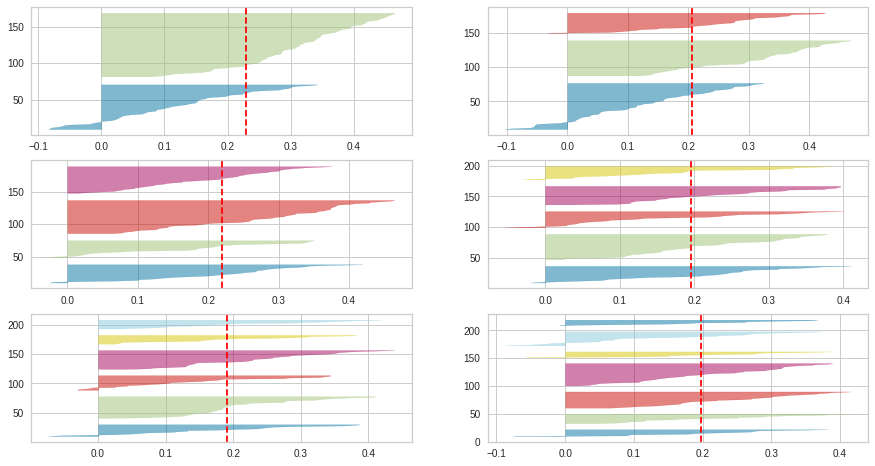

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_reduced)  

In [ ]:
def cluster(data, n_clusters,max_iter=300, fig_title="BMI"):
  kmeans = KMeans(init="random", n_clusters=n_clusters,  n_init=10, max_iter=max_iter, random_state=42)
  kmeans.fit(data)
  label=kmeans.fit_predict(data)
  u_label=np.unique(label)
  centroids=kmeans.cluster_centers_
  plt.title(f"{fig_title} data k-means clustering")
  plt.scatter(data[:,0], data[:,1], c=label, cmap='cividis')
  plt.scatter(centroids[:,0], centroids[:,1], s=200, color='r')


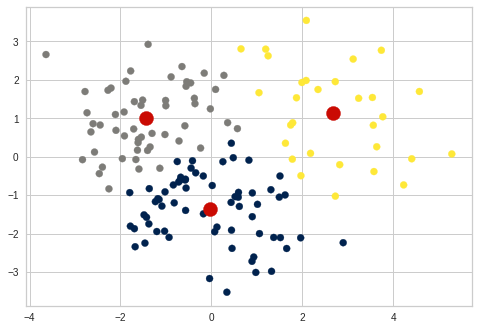

In [ ]:
cluster(data=df_reduced, n_clusters=3,max_iter=300)

In [ ]:
kmeans.inertia_, kmeans.score(df_reduced)

(937.6337691535247, -937.6337691535248)

## Visualization

We need to visualize the data to know our clusters.
For that we are focus on the colorrated variable (BMI, BMI_cat, Age, Level,weight).


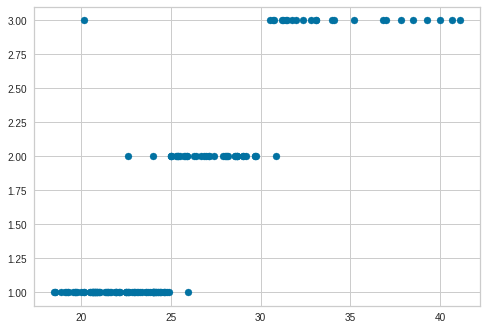

In [ ]:
plt.scatter(data["BMI"], data["BMI_Cat"])

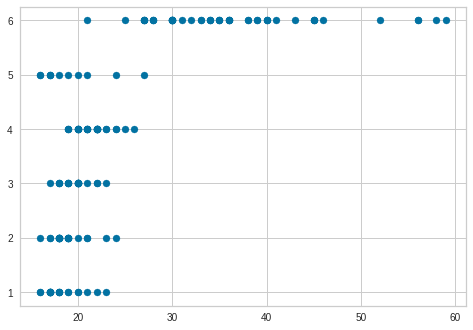

In [ ]:
plt.scatter(data["Age"], data["Level"])

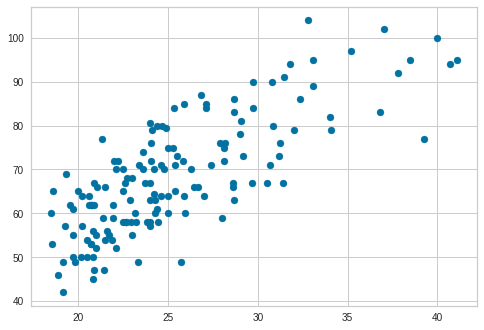

In [ ]:
plt.scatter(data["BMI"], data["Weight"])

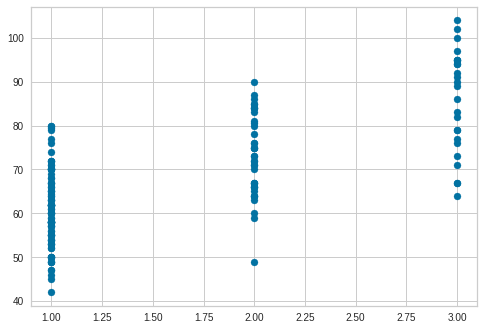

In [ ]:
plt.scatter(data["BMI_Cat"], data["Weight"])

BMI and Weight are well corralated, mean that our clusters are linked to the BMI and we just need to ckeck the BMI category.
We just need to insert the different data point of each category to know each cluster meanning.

In [ ]:
def checkClusterMean(df_reduced_data, n_clusters,max_iter):
  kmeans = KMeans(init="random", n_clusters=n_clusters,  n_init=10, max_iter=max_iter, random_state=42)
  kmeans.fit(df_reduced_data)
  label=kmeans.fit_predict(df_reduced_data)
  u_label=np.unique(label)
  centroids=kmeans.cluster_centers_
  plt.title("BMI data k-means clustering")
  plt.scatter(df_reduced_data[:,0], df_reduced_data[:,1], c=label, cmap='cividis')
  plt.scatter(df_reduced[0,0], df_reduced[0,1], c='g',lw=6,label='data point in over weight cluster')
  plt.scatter(df_reduced[100,0], df_reduced[100,1], c='b',lw=6,label='data point in normal weight cluster')
  plt.scatter(df_reduced[11,0], df_reduced[11,1], c='blue',lw=6,label='data point in under weight cluster')
  plt.scatter(centroids[:,0], centroids[:,1], s=200, color='r',label='centroides')
  plt.legend()

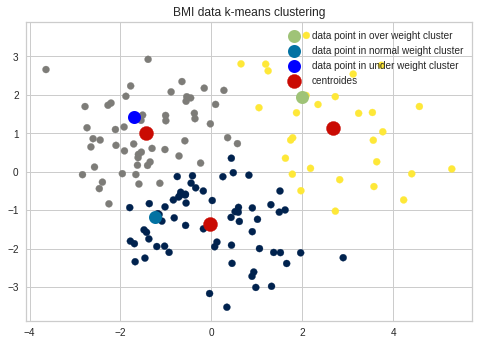

In [ ]:
checkClusterMean(df_reduced_data=df_reduced, n_clusters=3,max_iter=300)

jaune = surpoids, gris = normal, noir = souspoids

# Hierachical clustering

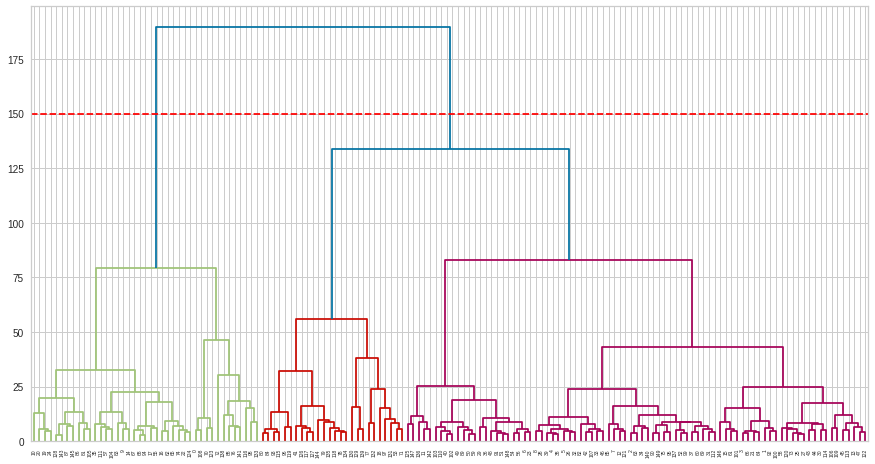

In [ ]:
clusters = hierarchy.linkage(data, method="ward")

plt.figure(figsize=(15, 8))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(150, color='red', linestyle='--'); 

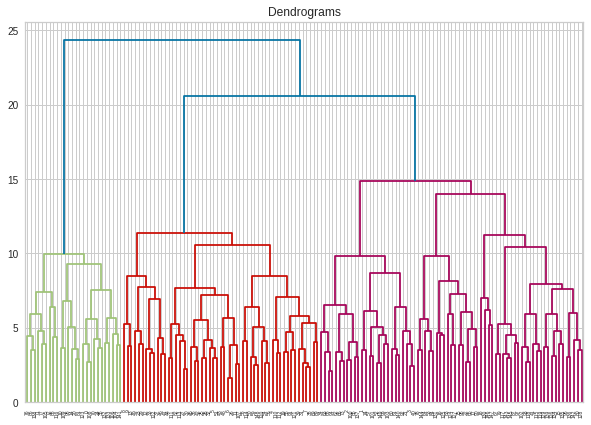

In [ ]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

## Fuzzy

In [ ]:
def fuzzy_cluster_selected(df_reduced,list_n_cluster):
  models=[]
  for cluster in list_n_cluster:
    fcm = FCM(n_clusters=cluster)
    fcm.fit(df_reduced)
    models.append(fcm)
  num_clusters = len(list_n_cluster)
  rows = int(np.ceil(np.sqrt(num_clusters)))
  cols = int(np.ceil(num_clusters/rows))
  f, axe = plt.subplots(rows,cols,figsize=(11,15))
  pces = {}
  for n_cluster , model , axe in zip(list_n_cluster,models,axe.ravel()):
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient
    pces[pec] = n_cluster
    fcm_centers = model.centers
    fcm_labels = model.predict(df_reduced)
    # plot 
    axe.scatter(df_reduced[:,0],df_reduced[:,1],c=fcm_labels,alpha=1,cmap='cividis')
    axe.scatter(fcm_centers[:,0],fcm_centers[:,1],marker="o",s=200)
    axe.set_title(f"n_clusters = {n_cluster}, PC ={pc:.3f}, PEC ={pec:.3f}  ")
  key_max = max(sorted(pces.keys()))
  print(f"best cludter number = {pces[key_max]}, pec={key_max} ")
  return pces[key_max], key_max

best cludter number = 3, pec=0.4800597034841815 


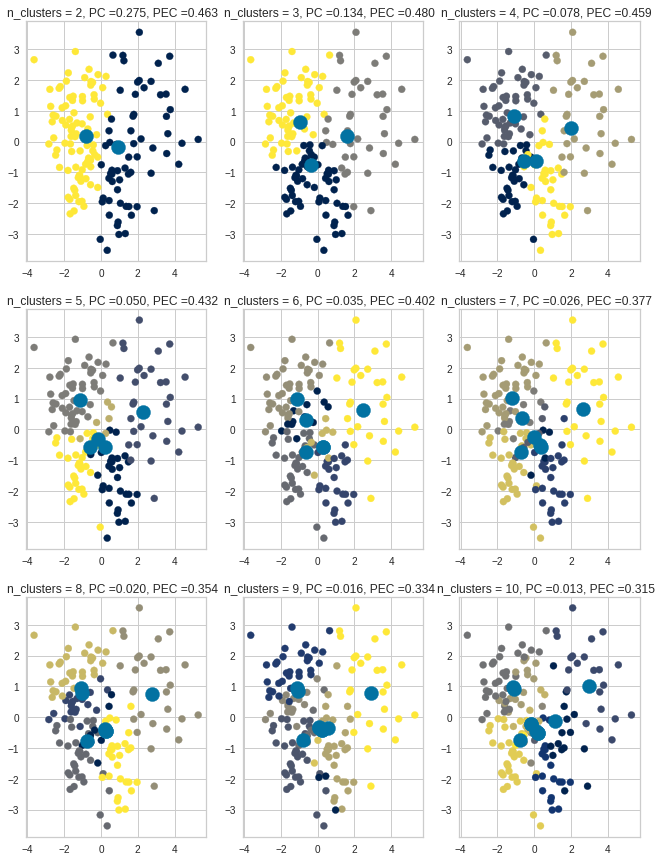

In [ ]:
num_cluster, pec = fuzzy_cluster_selected(df_reduced,list_n_cluster=range(2,11))

In [ ]:
print(num_cluster)

3


[0 1 2]


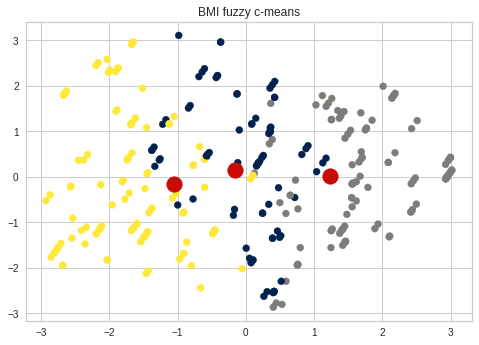

In [ ]:
def fuzzyCluster(data,num_cluster,plt_title="BMI"):
  fuzzy_model = FCM(n_clusters=num_cluster)
  fuzzy_model.fit(data)
  fcm_centers = fuzzy_model.centers
  fcm_labels = fuzzy_model.predict(data)
  print(np.unique(fcm_labels))
  plt.title(f"{plt_title} fuzzy c-means")
  plt.scatter(data[:,0], data[:,1], c=fcm_labels, cmap='cividis')
  plt.scatter(fcm_centers[:,0], fcm_centers[:,1], s=250, color='r')

fuzzyCluster(df_reduced,num_cluster=3)

## Lung dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Lung.csv")
data.head(20)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [ ]:
data.shape

(276, 16)

## Change the categorical value into numeric value

# Data preprocessing

In [ ]:
data = data.drop_duplicates(keep="first")
data.shape

(276, 16)

## Missing values

<Figure size 720x432 with 0 Axes>

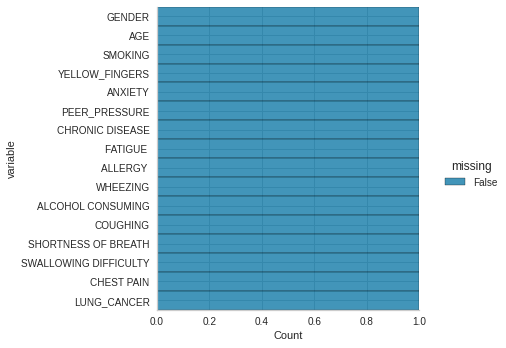

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

## Outliers

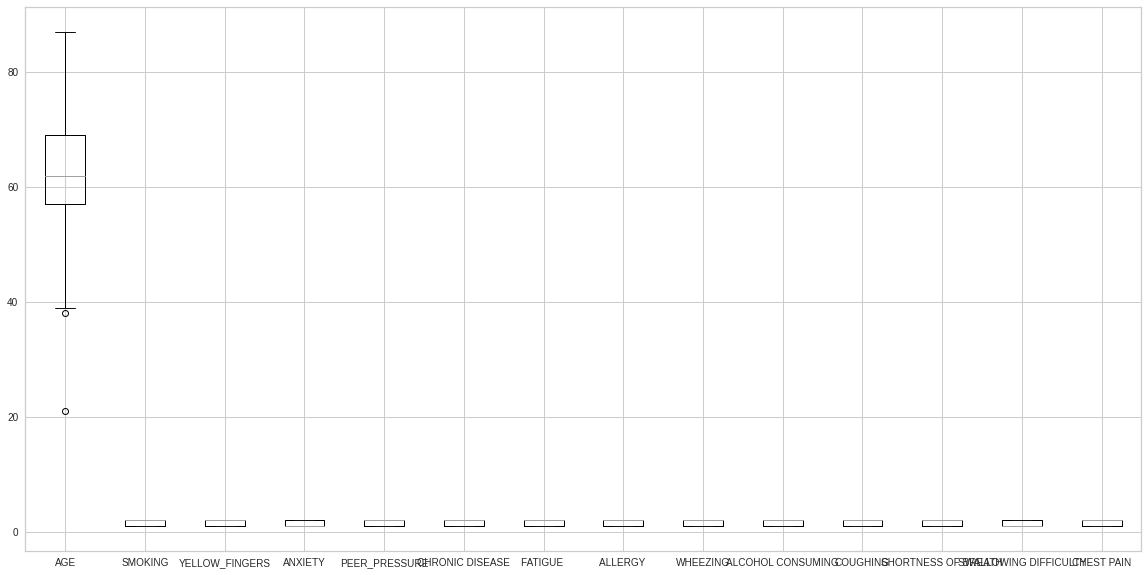

In [ ]:
plt.figure(figsize=(20,10))
data.boxplot()

## Correlation

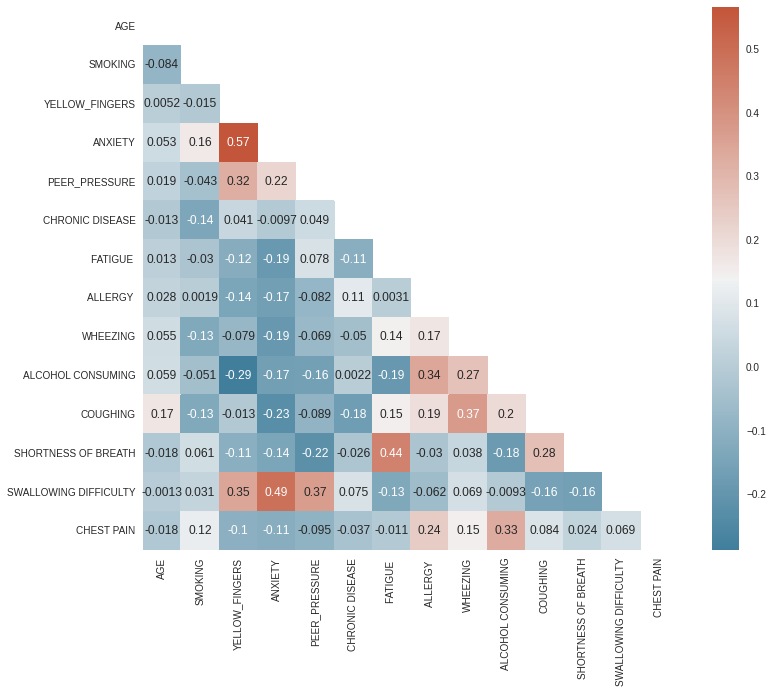

In [ ]:
corr = data.corr()

f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Standardization

In [ ]:
data = data.drop(["GENDER","LUNG_CANCER"], axis=1)

In [ ]:
data_scaled = StandardScaler().fit_transform(data)


# PCA

In [ ]:
pca = PCA(n_components=5)
df_reduced = pca.fit_transform(data_scaled)

### explained_variance_ratio_

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.19061209 0.12877915 0.10959064 0.09098636 0.07815302]
0.598121261469565


### Clustering

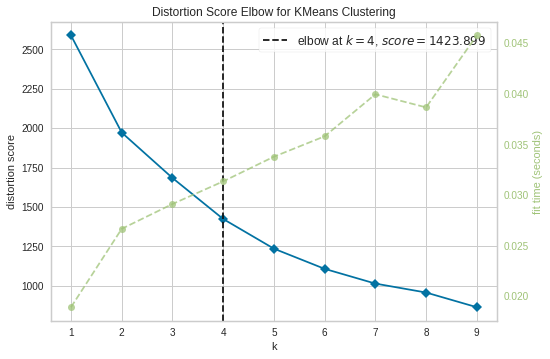

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df_reduced)        # Fit the data to the visualizer
visualizer.show()

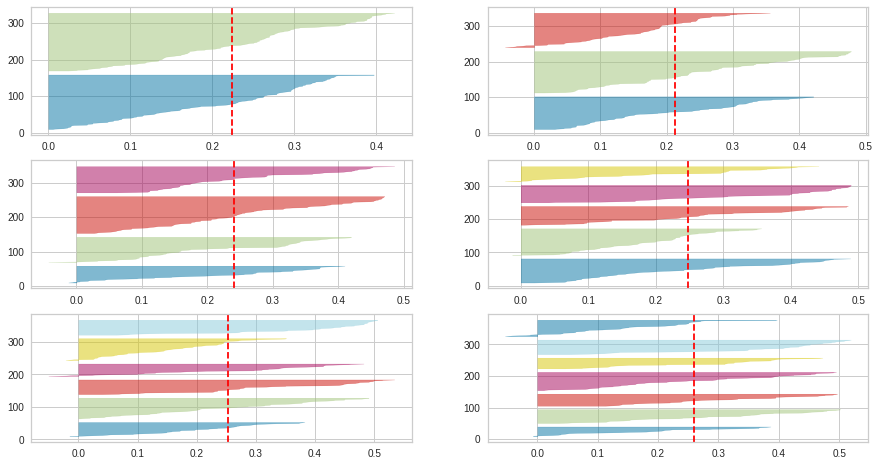

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_reduced)  

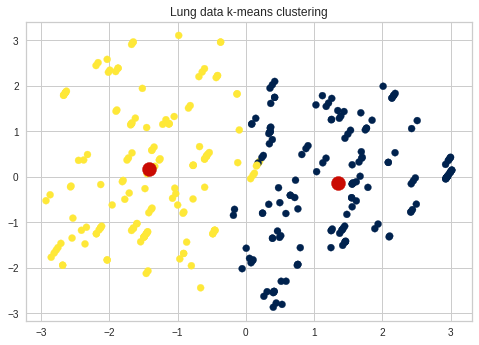

In [ ]:
cluster(data=df_reduced, n_clusters=2, fig_title="Lung")

In [ ]:
def checkClusterMean(df_reduced_data, n_clusters,max_iter):
  kmeans = KMeans(init="random", n_clusters=n_clusters,  n_init=10, max_iter=max_iter, random_state=42)
  kmeans.fit(df_reduced_data)
  label=kmeans.fit_predict(df_reduced_data)
  u_label=np.unique(label)
  centroids=kmeans.cluster_centers_
  plt.title("Lung data k-means clustering")
  plt.scatter(df_reduced_data[:,0], df_reduced_data[:,1], c=label, cmap='cividis')
  plt.scatter(df_reduced[18,0], df_reduced[18,1], c='g',lw=6,label='data point in yes lung_cancer')
  plt.scatter(df_reduced[19,0], df_reduced[19,1], c='b',lw=6,label='data point in no lung_cancer')
  plt.scatter(centroids[:,0], centroids[:,1], s=200, color='r',label='centroides')
  plt.legend()

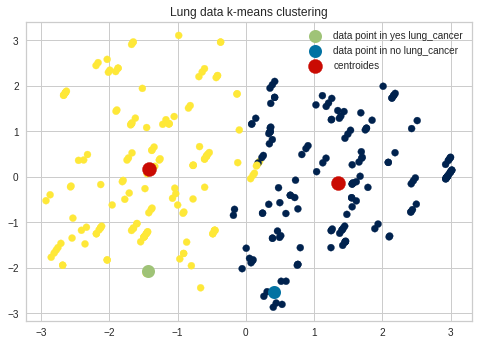

In [ ]:
checkClusterMean(df_reduced, n_clusters=2,max_iter=300)

## fuzzing cluster

best cludter number = 3, pec=0.49825560546580616 


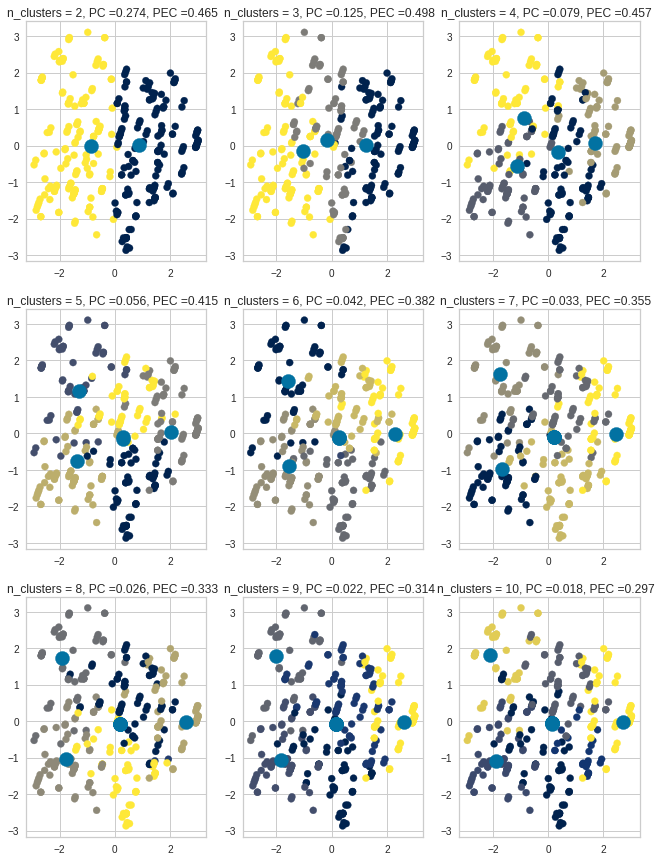

In [ ]:
num_cluster, pec = fuzzy_cluster_selected(df_reduced,list_n_cluster=range(2,11))

[0 1]


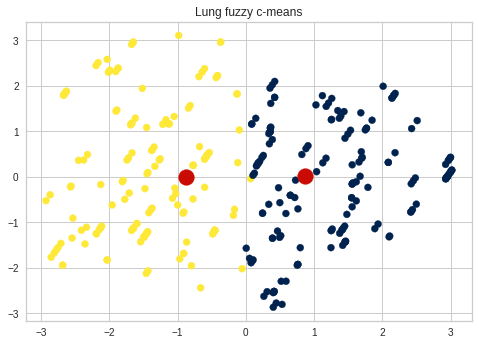

In [ ]:

fuzzyCluster(df_reduced,num_cluster=2,plt_title="Lung")